# Interop with SketchUp Model

## 1. Basic Data Structure

There are two basic data structures for representing a 3D SketchUp model in the `tqec` library:

1. `ZXGraph`: ZX-calculus graph representation of the 3D model. Each spider represents a cube in the model and the Z/X type of the spider determines the color of the block.
2. `BlockGraph`: The explicit graph representation of a 3D model. The `Cube`s are the nodes in the graph and the edge represent the `Pipe` connecting two `Cube`s.

A `ZXGraph` can be converted to a `BlockGraph` by calling the `to_block_graph` method. The explicit block structures will be inferred from the `ZXGraph` and some validity checks will be performed. And a `BlockGraph` can be converted to a `ZXGraph` by calling the `to_zx_graph` method.

## 2. Examples

In [8]:
from typing import Literal

from pathlib import Path

import matplotlib.pyplot as plt

from tqec import (
    Position3D,
    ZXGraph,
    BlockGraph,
    ZXKind,
    ZXNode,
    Cube,
    ZXCube,
    Port,
    PipeKind,
    Direction3D,
    SignedDirection3D,
)
from tqec.computation.zx_plot import draw_zx_graph_on, draw_correlation_surface_on

ASSETS_FOLDER = Path("../../assets/").resolve()

### 2.1 Import a SketchUp-exported `.dae` model as a `BlockGraph`

In [9]:
read_block_graph = BlockGraph.from_dae_file(
    ASSETS_FOLDER / "logical_cnot.dae", "Import Logical CNOT Block Graph"
)

### 2.2 Display the Collada model in IPython

By calling `view_as_html` method, we can convert the `BlockGraph` to a Collada model and display the model in IPython compatible environments as embedded html with the help of `three.js`. Or we can save the visualization as a `.html` file and open it in a browser.

Function `display_collada_model` can also be used to display an arbitrary Collada model in IPython.

In [10]:
read_block_graph.view_as_html()

### 2.3 Construct a logical CNOT with `ZXGraph`

Here we show how to construct a logical CNOT gate with `ZXGraph` and convert it to a `BlockGraph`. The code is equivalent to `tqec.gallery.logical_cnot_zx_graph`.

In [11]:
def logical_cnot_zx_graph(port_type: Literal["Z", "X", "OPEN"]) -> ZXGraph:
    """Create the `ZXGraph` for the logical CNOT gate with the given port type."""
    if port_type != "OPEN":
        name = f"Logical CNOT with {port_type}-basis ports"
    else:
        name = "Logical CNOT with open ports"
    g = ZXGraph(name)
    g.add_edge(
        ZXNode(Position3D(0, 0, 0), ZXKind.P, "In_Control"),
        ZXNode(Position3D(0, 0, 1), ZXKind.Z),
    )
    g.add_edge(
        ZXNode(Position3D(0, 0, 1), ZXKind.Z),
        ZXNode(Position3D(0, 0, 2), ZXKind.X),
    )
    g.add_edge(
        ZXNode(Position3D(0, 0, 2), ZXKind.X),
        ZXNode(Position3D(0, 0, 3), ZXKind.P, "Out_Control"),
    )
    g.add_edge(
        ZXNode(Position3D(0, 0, 1), ZXKind.Z),
        ZXNode(Position3D(0, 1, 1), ZXKind.Z),
    )
    g.add_edge(
        ZXNode(Position3D(0, 1, 1), ZXKind.Z),
        ZXNode(Position3D(0, 1, 2), ZXKind.X),
    )
    g.add_edge(
        ZXNode(Position3D(0, 1, 2), ZXKind.X),
        ZXNode(Position3D(1, 1, 2), ZXKind.X),
    )
    g.add_edge(
        ZXNode(Position3D(1, 1, 0), ZXKind.P, "In_Target"),
        ZXNode(Position3D(1, 1, 1), ZXKind.X),
    )
    g.add_edge(
        ZXNode(Position3D(1, 1, 1), ZXKind.X),
        ZXNode(Position3D(1, 1, 2), ZXKind.X),
    )
    g.add_edge(
        ZXNode(Position3D(1, 1, 2), ZXKind.X),
        ZXNode(Position3D(1, 1, 3), ZXKind.P, "Out_Target"),
    )

    if port_type != "OPEN":
        g.fill_ports(ZXKind(port_type))
    return g

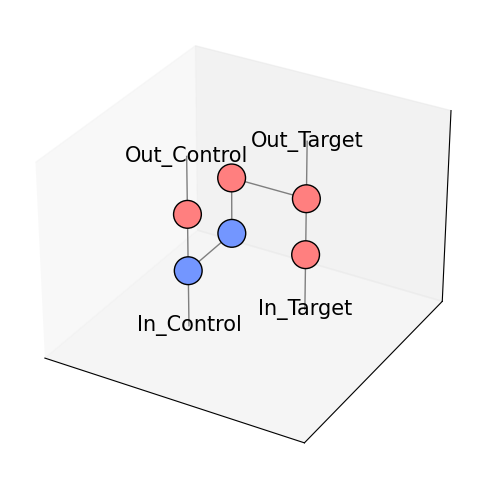

In [12]:
zx_graph = logical_cnot_zx_graph("OPEN")
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
draw_zx_graph_on(zx_graph, ax)

In [13]:
logical_cnot_block_graph = zx_graph.to_block_graph("Logical CNOT Block Graph")
logical_cnot_block_graph.view_as_html()

### 2.4 Construct a `BlockGraph` directly

Here we show how to construct a `BlockGraph` directly without using `ZXGraph`, then we save it to a `.dae` file.

In [14]:
four_way_junction_with_hadamards = BlockGraph("Four Way Junction with Hadamards")
four_way_junction_with_hadamards.add_edge(
    Cube(Position3D(0, 0, 0), ZXCube.from_str("XXZ")),
    Cube(Position3D(0, 1, 0), Port(), "p1"),
    PipeKind.from_str("XOZH"),
)
four_way_junction_with_hadamards.add_edge(
    Cube(Position3D(0, 0, 0), ZXCube.from_str("XXZ")),
    Cube(Position3D(1, 0, 0), Port(), "p2"),
    PipeKind.from_str("OXZH"),
)
four_way_junction_with_hadamards.add_edge(
    Cube(Position3D(0, 0, 0), ZXCube.from_str("XXZ")),
    Cube(Position3D(-1, 0, 0), Port(), "p3"),
    PipeKind.from_str("OZXH"),
)
four_way_junction_with_hadamards.add_edge(
    Cube(Position3D(0, 0, 0), ZXCube.from_str("XXZ")),
    Cube(Position3D(0, -1, 0), Port(), "p4"),
    PipeKind.from_str("ZOXH"),
)

four_way_junction_with_hadamards.view_as_html()

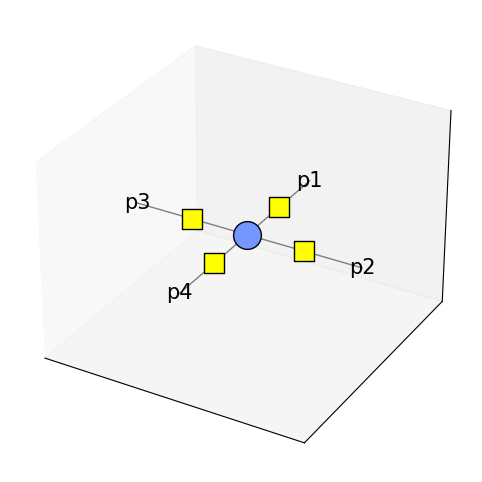

In [15]:
four_way_junction_with_hadamards_zx_graph = (
    four_way_junction_with_hadamards.to_zx_graph(
        "Four Way Junction with Hadamards ZX Graph"
    )
)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
draw_zx_graph_on(four_way_junction_with_hadamards_zx_graph, ax)

In [16]:
four_way_junction_with_hadamards.to_dae_file(
    "four_way_junction_with_hadamards.dae",
)

### 2.5 Correlation Surface

Here we show how to find correlation surfaces in a logical computation and visualize them. Here we use a logical S gate via gate teleportation as an example.

In [17]:
zx_graph = ZXGraph()
zx_graph.add_edge(
    ZXNode(Position3D(0, 0, 0), ZXKind.P, "in"),
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
)
zx_graph.add_edge(
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
    ZXNode(Position3D(0, 0, 2), ZXKind.P, "out"),
)
zx_graph.add_edge(
    ZXNode(Position3D(0, 0, 1), ZXKind.Z),
    ZXNode(Position3D(1, 0, 1), ZXKind.Z),
)
zx_graph.add_edge(
    ZXNode(Position3D(1, 0, 1), ZXKind.Z),
    ZXNode(Position3D(1, 0, 2), ZXKind.Y),
)
correlation_surfaces = zx_graph.find_correration_surfaces()

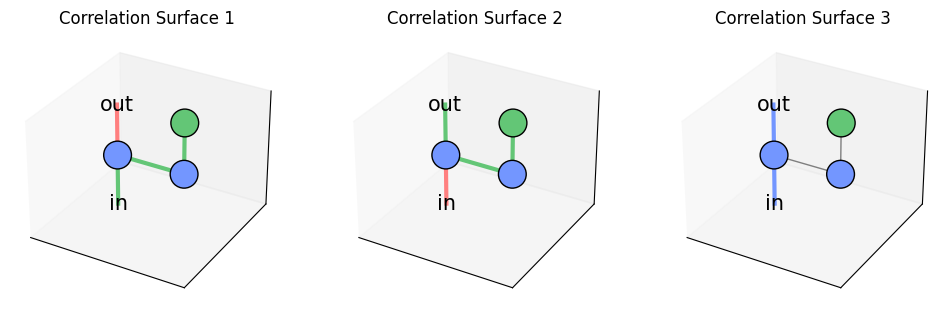

In [18]:
fig = plt.figure(figsize=(12, 6))
for i, surface in enumerate(correlation_surfaces):
    ax = fig.add_subplot(1, 3, i + 1, projection="3d")
    draw_zx_graph_on(zx_graph, ax)
    draw_correlation_surface_on(correlation_surfaces[i], ax)
    ax.set_title(f"Correlation Surface {i+1}")

In [19]:
block_graph = zx_graph.to_block_graph()
block_graph.view_as_html(
    pop_faces_at_direction=SignedDirection3D(Direction3D.Y, False),
    show_correlation_surface=correlation_surfaces[0],
)